***
# The Sparks Foundation
## Data Science and Business Analytics Internship #GRIPFEB21
#### Task 1 - _Prediction Using Supervised Model_
***

__Name__ : Pratik Mahadev Ghodke
***
In this task, we are working on a simple <span style="color:gray">__supervised machine learning model__</span> to make some predictions on given dataset. Supervised machine learning is a type of machine learning in which a <span style="color:gray">__label of target is given__</span> i.e. we already have an idea what we have to predict.<br>
Here, we have a simple dataset which represents how amount of time (hours) spend while studying can affect actual test scores. In this case,we are going to use <span style="color:gray">__Linear Regression__</span> model for training and predictions.
***

# Imports and Data Preparation

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
# Setting up graph format and size

matplotlib.rcParams["figure.figsize"] = (12, 6)
matplotlib.rcParams["font.size"] = 14


In [2]:
# Reading data from remote link and use it as our dataset.

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Exploration
***
In this dataset, <span style="color:gray">__25 rows__</span> and <span style="color:gray">__2 columns__</span> are present each representing trend in studying for hours and scores gained. Also from graph below, we can see that usually people <span style="color:gray">__who study more tend to get more scores__</span> in test ! Here, data seems to be alright ... Hence there is no need to do more processing.
***

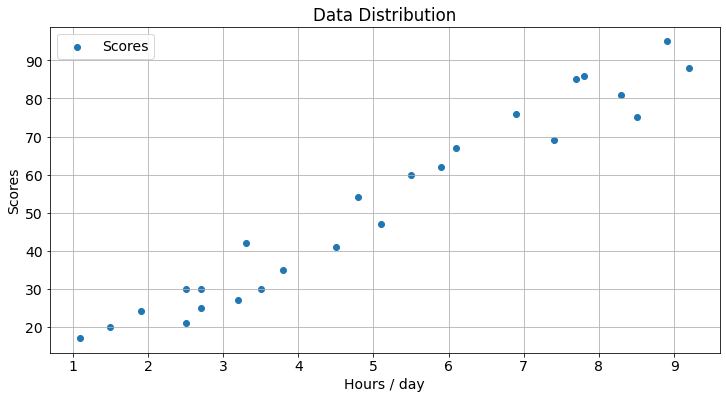

In [25]:
plt.scatter(data.Hours, data.Scores);
plt.grid()
plt.title("Data Distribution")
plt.xlabel("Hours / day")
plt.ylabel("Scores")
plt.legend(['Scores'])
plt.show()

***
Now we are splitting data to <span style="color:gray">__train and target data__</span> and further divided into <span style="color:gray">__train and test data__</span> for the purpose of training and testing our model.
***

In [6]:
# Splitting Data

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Model Training and Predictions
***
As now we have splitted data in the way we want. Now, let's use this data and train a model. Then, make some predictions to check whether our model gives correct predictions or not.
***

In [33]:
# Let's create  a simple Linear Regression model make predictions

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [34]:
# Predicting scores for given amount of hours

y_pred = regressor.predict(x_test)

In [35]:
# Visualize the results

pd.DataFrame({
    "Original Output" : y_test,
    "Predicted Output" : y_pred
})

,Original Output,Predicted Output
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# Model Evaluation
***
After training our model and making some prediction lets check how our model is performing in terms of metrics.
***

In [40]:
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error :', mean_absolute_error(y_test, y_pred))
print('Accuracy Score      :', regressor.score(x_test, y_test) * 100)

Mean Absolute Error : 4.183859899002975
Accuracy Score      : 94.54906892105355


***
As we can see, our model has predicted some results (scores) for given data (hours / day). It is not exactly accurate but it's close. We have <span style="color:gray">__mean absoute error__</span> of <span style="color:green">__4.1834__</span> which is good. This model has <span style="color:gray">__accuracy score__</span> of <span style="color:green">__94.54__</span> which is Amazing!
***

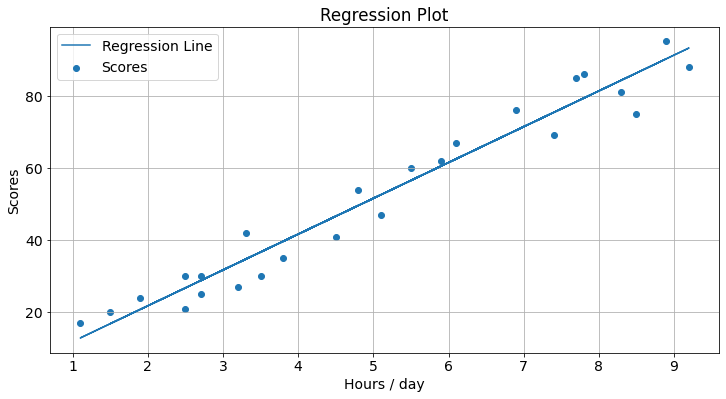

In [24]:
line = regressor.coef_ * x + regressor.intercept_

plt.scatter(x, y)
plt.plot(x, line)
plt.grid()
plt.title('Regression Plot')
plt.xlabel('Hours / day')
plt.ylabel('Scores')
plt.legend(['Regression Line', 'Scores'])
plt.show()

***
The above plot shows linear relationship between <span style="color:gray">__hours vs scores__</span>. The line fits itself such that the average distace of points from line remains minimum.
***
Let's make a custom prediction and see the output ...

In [20]:
# Make Prediction

hours = 9.25
prediction = regressor.predict([[hours]])

print('Prediction : ', prediction[0])

Prediction :  93.69173248737535


***
If someone is willing to spend <span style="color:green">__9.25__</span> hours per day, then that person might be able to score <span style="color:green">__93.69 %__</span> ! Which seems correct !
***